# Imports

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OrdinalEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from tensorflow.keras import Sequential
from tensorflow.keras import metrics
from tensorflow.keras.layers import Dense,Dropout

from sklearn import set_config
set_config(transform_output='pandas')
pd.set_option('display.max_columns',100)

# Data

In [2]:
df=pd.read_csv('Data/flight_df - flight_df.csv')
df.info() 
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                20000 non-null  int64
 1   Class                              20000 non-null  int64
 2   Flight Distance                    20000 non-null  int64
 3   Inflight wifi service              20000 non-null  int64
 4   Departure/Arrival time convenient  20000 non-null  int64
 5   Ease of Online booking             20000 non-null  int64
 6   Gate location                      20000 non-null  int64
 7   Food and drink                     20000 non-null  int64
 8   Online boarding                    20000 non-null  int64
 9   Seat comfort                       20000 non-null  int64
 10  Inflight entertainment             20000 non-null  int64
 11  On-board service                   20000 non-null  int64
 12  Leg room service  

,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Loyal Customer,Business Travel,satisfied
0,26,3,2062,2,3,3,3,2,2,2,2,3,3,3,3,3,2,0,0,0,1,1,0
1,52,3,680,5,5,5,5,3,4,4,4,4,4,4,4,4,4,18,2,0,1,1,1
2,28,1,188,3,5,3,4,3,3,3,3,3,3,4,4,5,3,0,0,1,1,0,0
3,54,3,453,3,5,5,5,3,4,4,3,3,3,3,4,3,1,91,80,0,1,1,0
4,40,1,775,4,3,3,3,4,4,4,4,1,1,3,3,3,4,0,0,1,1,1,0


In [3]:
df.duplicated().sum()

0

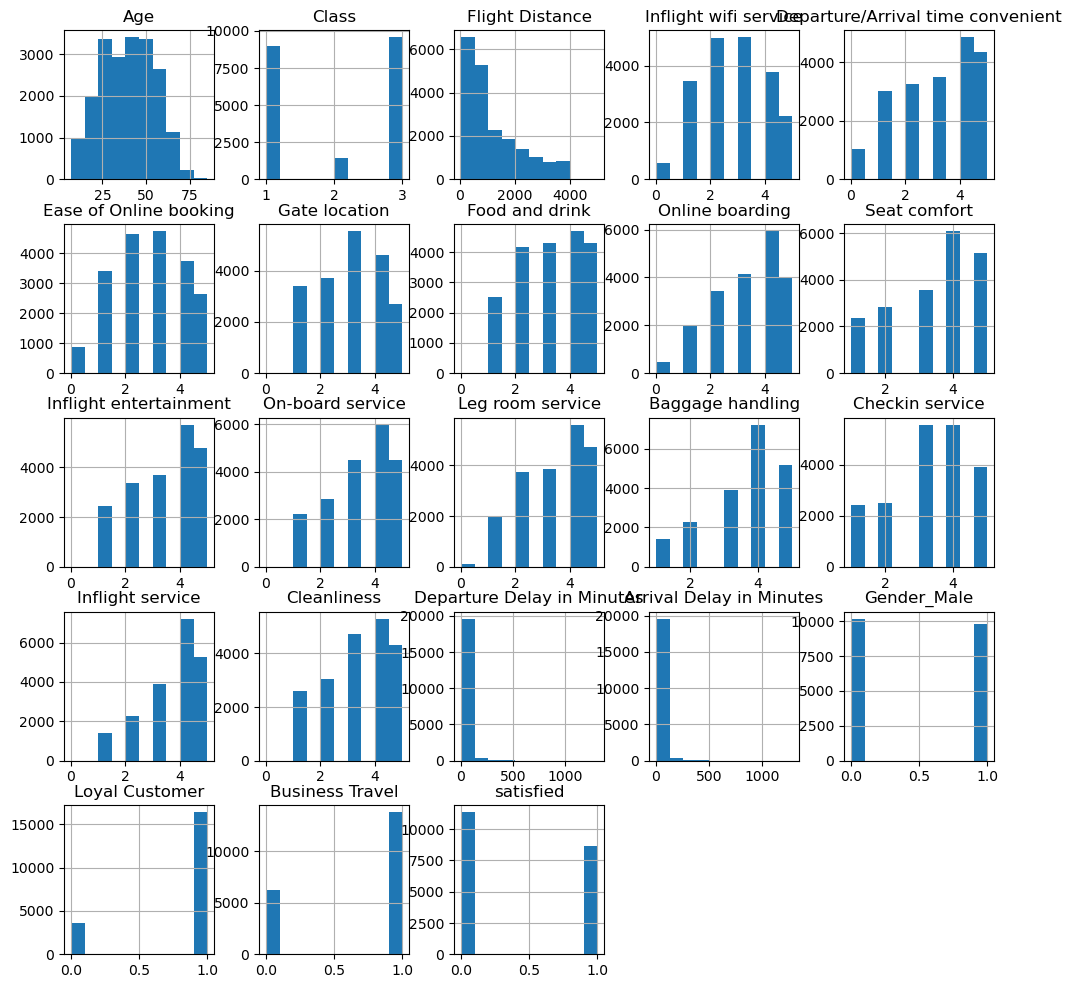

In [6]:
df.hist(figsize=(12,12));

In [7]:
X_scaled = MinMaxScaler().fit_transform(df)
X_scaled.describe()

,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Loyal Customer,Business Travel,satisfied
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.00000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,0.416375,0.513900,0.233754,0.545590,0.611220,0.55022,0.594270,0.640420,0.651060,0.609775,0.66982,0.67707,0.67017,0.655913,0.575712,0.727110,0.656530,0.010972,0.011483,0.490650,0.817850,0.687900,0.43305
std,0.193704,0.481527,0.202168,0.265377,0.306227,0.27936,0.255915,0.266477,0.269697,0.330859,0.26667,0.25569,0.26332,0.296709,0.314783,0.236803,0.262347,0.027932,0.028828,0.499925,0.385978,0.463362,0.49551
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.256410,0.000000,0.077342,0.400000,0.400000,0.40000,0.400000,0.400000,0.400000,0.250000,0.40000,0.40000,0.40000,0.500000,0.500000,0.600000,0.400000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000
50%,0.423077,0.500000,0.163772,0.600000,0.600000,0.60000,0.600000,0.600000,0.600000,0.750000,0.80000,0.80000,0.80000,0.750000,0.500000,0.800000,0.600000,0.000000,0.000000,0.000000,1.000000,1.000000,0.00000
75%,0.564103,1.000000,0.343700,0.800000,0.800000,0.80000,0.800000,0.800000,0.800000,1.000000,0.80000,0.80000,0.80000,1.000000,0.750000,1.000000,0.800000,0.009195,0.010156,1.000000,1.000000,1.000000,1.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


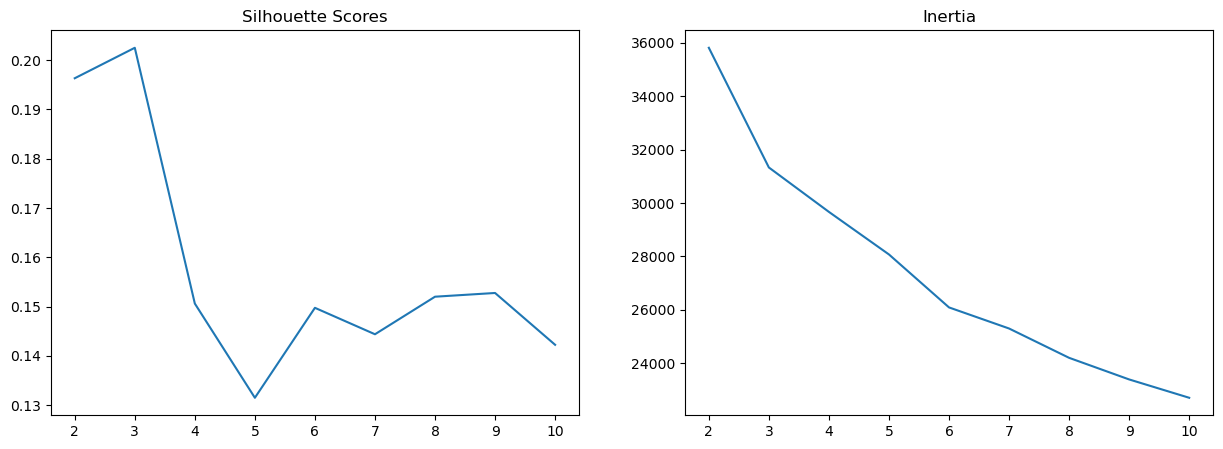

In [13]:
ks = range(2,11)
inertias = []
sils = []

for k in ks:
    kmeans = KMeans(n_clusters=k,n_init = 'auto', random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    sils.append(silhouette_score(X_scaled, kmeans.labels_))

fig, axes = plt.subplots(1,2, figsize = (15,5))
axes[0].plot(ks,sils)
axes[0].set_title('Silhouette Scores')
axes[0].set_xticks(ks)
axes[1].plot(ks, inertias)
axes[1].set_title('Inertia')
axes[1].set_xticks(ks);

In [14]:
kmeans = KMeans(n_clusters=3, n_init='auto', random_state=42)
kmeans.fit(X_scaled)

df['cluster'] = kmeans.labels_
df.head()

,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Loyal Customer,Business Travel,satisfied,cluster
0,26,3,2062,2,3,3,3,2,2,2,2,3,3,3,3,3,2,0,0,0,1,1,0,2
1,52,3,680,5,5,5,5,3,4,4,4,4,4,4,4,4,4,18,2,0,1,1,1,1
2,28,1,188,3,5,3,4,3,3,3,3,3,3,4,4,5,3,0,0,1,1,0,0,0
3,54,3,453,3,5,5,5,3,4,4,3,3,3,3,4,3,1,91,80,0,1,1,0,2
4,40,1,775,4,3,3,3,4,4,4,4,1,1,3,3,3,4,0,0,1,1,1,0,2


In [15]:
cluster_groups = df.groupby('cluster', as_index=False).mean()
cluster_groups

,cluster,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Loyal Customer,Business Travel,satisfied
0,0,38.573465,1.223068,787.375668,2.498623,3.657055,2.454722,2.921756,3.083590,2.787948,3.203791,3.063988,3.273935,3.063340,3.569415,3.336303,3.612182,3.135752,14.261137,14.555484,0.489227,0.995788,0.000162,0.090718
1,1,42.728297,2.733869,1635.560249,3.178025,2.940788,3.027857,2.994947,3.635009,4.158590,4.130086,4.108707,3.913579,3.909432,4.004924,3.690205,3.998575,3.865509,12.669215,12.795284,0.504924,0.926535,0.991060,0.995595
2,2,36.283189,1.948928,1029.175970,2.391062,2.594533,2.700933,2.991652,2.774922,2.586348,2.803896,2.677525,2.830578,2.935669,3.196759,2.779669,3.200524,2.694713,16.459650,17.246685,0.474055,0.500737,0.999836,0.068260


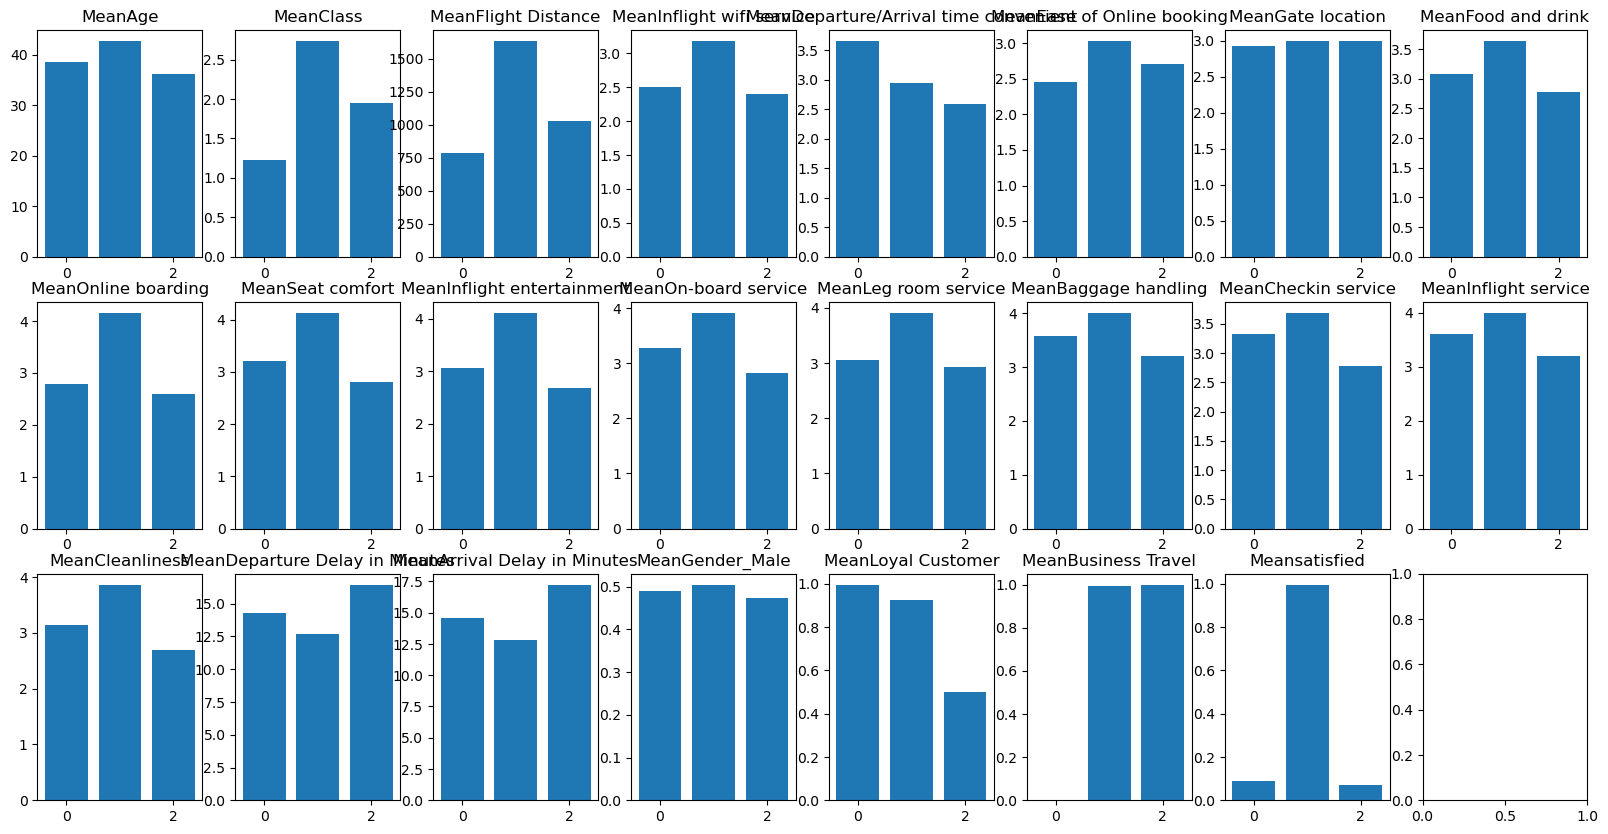

In [26]:
fig, axes = plt.subplots(3,8, figsize = (20,10))
axes = axes.ravel()

for i, col in enumerate(cluster_groups.columns[1:]):
    axes[i].bar(cluster_groups['cluster'], cluster_groups[col])
    axes[i].set_title(f'Mean{col}')

Cluster 0
Has a mean age of just under 40.  They have the second lowest satisfaction and higest average of loyal customers.  No business trvelers.  This cluster also has the lowest average class when traveling.  They seem to be your average person/family looking for value, and traveling for a vacation.  They have the second higest average in departure and arrival delays, however seem to have the higest average convenient Departure/Arrival time, which would make me assume they are traveling durring daylight hours, some of the most busiest time to travel.  This cluster have the lowest average in Business trave, online booking, flight distance and class.  

target = ('satisfied')
y = df[target]
X = df.drop(columns=target)

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42)